# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [129]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')

In [130]:
df_train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [131]:
# рассчитаем доли классов
print(len(df_train[df_train['target']==0]), 
      len(df_train[df_train['target']==1]),
      len(df_train[df_train['target']==1])/len(df_train[df_train['target']==0]))

21925 2787 0.12711516533637401


In [ ]:
#Классы не сбалансированы

In [132]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [135]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
    
        

_id
{'c376fbd17f5f055a0182a54f97ab8133', 'f45077defebfe7a375e01c94a1c230ef', '734d96316026406d69179bad980a31cf', 'a2507934facd1181b8fc7930b6f1c4bf', '083c1d3d76543d3ef7a47cc09f61dc28', 'ab533ac48bec494cf42c5d1775489483', 'f42eba623cd8da3548e467dfb969dd53', '75095b829f562fe3ba965ef23f80557f', '92aa86ec4e05fabdd572f7a05012eb46', '22497132074b1716249e8263f3a0db5a', '18b5aa570e29dbc3be9b9526636a2c8a', '1ded2e10b0f4c4a343a6a581420a0b13', '80e5cfe32800f0708a93b641faf0bf31', '49dea3baf2b33b0a79ffc33d303936bc', 'e7e23d9a5e8e8793d7add1d9fbbdc6b5', '2c9d78a0990b284b8f784a424d5250db', '805a0f691c03ab12dfa17aa590673824', '8762bfff664d971c67aad4a26d1ff9bf', '28c2251c561c00077af4f4d9d552c809', '115cefaa929c8b579e3cf519907b15e0', 'abd59198f21b385445f13f6e0baccccb', '2af356a7c77d7a97a6d1ed7a93facc39', '42e4320bffb81e14b3dfe578d22a8077', '325408332988588c00a521a39a8bdf8c', '4aafc383bc62b098727ef7b6d4d8edb2', 'aadf8cb2ab00c1d75ba0695ba231723d', 'abb273cd6f347e6671b3e3894086b529', '7b0dd6967cc005ffc9f700

In [179]:
#Создаю списки для обработки
one_zero = ['default','housing','loan'] 
one_hot_o=['contact']
big_category=['job','education']
one_hot=['job','education','contact']

In [195]:
#Функция для преобработки
def preproc_data(df_input):
    
    df_output = df_input.copy()
    df_output =  df_output.drop(columns='_id',axis=1)
    df_output[one_zero] = df_output[one_zero].applymap(lambda x: 1 if  x=='yes' else 0).astype('int')
    df_output=df_output.drop(columns=['day_of_week','month'], axis=1)
    df_output['marital'] = df_output['marital'].map(lambda x: 1 if  x=='married' else 0).astype('int')
    df_output['poutcome'] = df_output['poutcome'].map(lambda x: 1 if  x=='success' else 0).astype('int')
    df_output=pd.get_dummies(df_output, columns=one_hot)
    '''df_output['month']=df_output['month'].map(lambda x: 3 if x=='mar' else (4 if x=='apr' else (5 if x=='may'
                        else(6 if x=='jun' else(7 if x=='jul' else (8 if x=='aug' else (9 if x=='sep' else (
                        10 if x=='oct' else (11 if x=='nov' else 12)))))))))'''
    df_output.loc[:, ['pdays']] = df_output.loc[:, ['pdays']].replace({999: 0})
    return df_output

In [299]:
df_train_preproc = df_train.pipe(preproc_data)
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 37 columns):
age                              16476 non-null int64
marital                          16476 non-null int32
default                          16476 non-null int32
housing                          16476 non-null int32
loan                             16476 non-null int32
duration                         16476 non-null int64
campaign                         16476 non-null int64
pdays                            16476 non-null int64
previous                         16476 non-null int64
poutcome                         16476 non-null int32
emp.var.rate                     16476 non-null float64
cons.price.idx                   16476 non-null float64
cons.conf.idx                    16476 non-null float64
euribor3m                        16476 non-null float64
nr.employed                      16476 non-null float64
job_admin.                       16476 non-null uint8
job_blue-collar  

In [197]:
y = df_train_preproc['target']
X = df_train_preproc.drop(columns='target', axis=1)

In [199]:
#Разбиваем выборку для обучения на тренировочные данные и данные для проверки
from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [200]:
#Обучаем дерево решений
model_DT = DecisionTreeClassifier(random_state=123)
cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=132)
train_scores, valid_scores = validation_curve(model_DT, X_train, y_train, 
                                              'max_depth', range(1, 12),
                                              cv=cv, scoring='roc_auc')

Text(0,0.5,'ROC AUC')

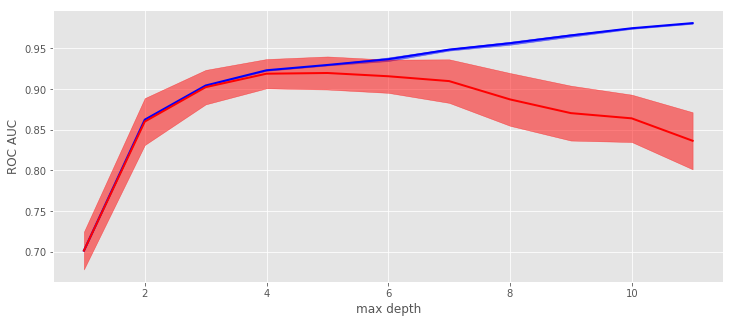

In [220]:
#Строим график, опредялем момент переобучения от глубины дерева
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,12), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,12), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,12), train_score_mean, c='b', lw=2)
plt.plot(range(1,12), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [221]:
#Пробуем подобрать параметры
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(4, 9),
    'min_samples_leaf': range(5, 15),
    'class_weight': [None, 'balanced']}

# FIXME не осилил английское описание как работает class_weight
# без max_depth и min_sapmles_leaf roc_auc совсем печальный
# как понял - именно этот параметр надо теребонькать когда выборка не сбалансированная, как у нас

# разницы между GridSearchCV и RandomizedSearchCV не заметил
grid_search = GridSearchCV(model_DT, param_grid=param_grid, n_jobs=-1,
                                   cv=cv, scoring='roc_auc')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=30, random_state=132, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=7, max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(4, 9), 'min_samples_leaf': range(5, 15), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [222]:
#Лучшие параметры по версии Грид серча)
grid_search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5}

In [292]:
best_model_DT = grid_search.best_estimator_

In [293]:
#Смотрим чем руководствуется наше дерево
model = best_model_DT
imp = model.feature_importances_
pd.Series(index=df_train_preproc.columns[:-1], data=imp).sort_values()

age                              0.000000
job_management                   0.000000
job_retired                      0.000000
job_self-employed                0.000000
job_services                     0.000000
job_student                      0.000000
job_technician                   0.000000
job_unemployed                   0.000000
job_unknown                      0.000000
education_basic.4y               0.000000
education_basic.6y               0.000000
education_basic.9y               0.000000
education_high.school            0.000000
education_illiterate             0.000000
education_professional.course    0.000000
education_university.degree      0.000000
job_housemaid                    0.000000
education_unknown                0.000000
job_entrepreneur                 0.000000
job_admin.                       0.000000
marital                          0.000000
default                          0.000000
housing                          0.000000
loan                             0

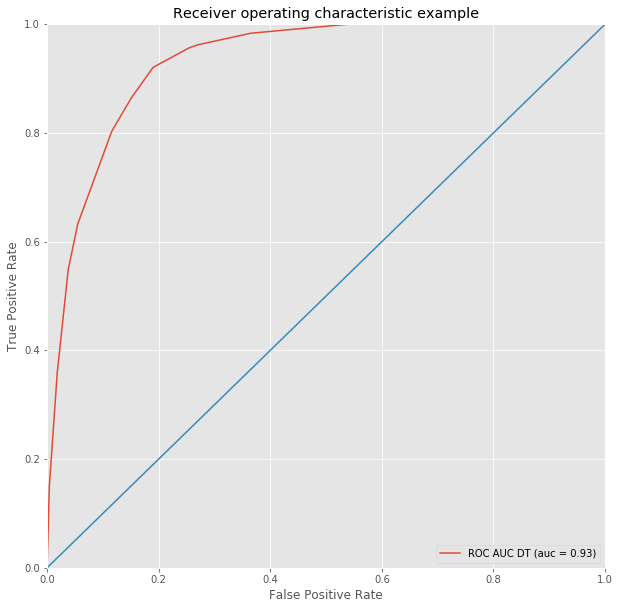

In [294]:
models=[best_model_DT.predict_proba(X_valid)]
models_name ='DT'
plt.figure(figsize=(10, 10)) 
fpr, tpr, thresholds = roc_curve(y_valid, best_model_DT.predict_proba(X_valid)[:,1])
md=models_name
roc_auc=roc_auc_score(y_valid, best_model_DT.predict_proba(X_valid)[:,1])
plt.plot(fpr, tpr, label='ROC AUC %s (auc = %0.2f)' % (md, roc_auc))
   

plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

In [295]:
roc_auc_score(best_model_DT.predict(X_valid), y_valid)

0.79689391037916502

In [296]:
print(classification_report(y_valid, best_model_DT.predict(X_valid)))


             precision    recall  f1-score   support

          0       0.94      0.96      0.95      6571
          1       0.65      0.54      0.59       843

avg / total       0.91      0.91      0.91      7414



In [297]:
from sklearn.tree import export_graphviz
export_graphviz(best_model_DT, 
out_file='treex.dot',feature_names=X.columns, filled=True)
!dot -Tpng treex.dot -o treex.png

In [251]:
#Логистическая регрессия

In [238]:
param_grid = {
    'C': randint(1, 10),
    'tol': [1e-4, 1e-5, 1e-3],
    'class_weight': [None, 'balanced']}
cv_logit = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
model_logit = LogisticRegression(random_state=123)
random_search = RandomizedSearchCV(model_logit, param_distributions=param_grid, n_iter=100, n_jobs=-1,
                                   cv=cv_logit, scoring='roc_auc', random_state=123)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13478E50>, 'tol': [0.0001, 1e-05, 0.001], 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [240]:
random_search.best_score_

0.92717936574283621

In [280]:
best_model_logit = random_search.best_estimator_

In [281]:
print(classification_report(y_valid, best_model_logit.predict(X_valid)))

             precision    recall  f1-score   support

          0       0.98      0.85      0.91      6571
          1       0.43      0.88      0.58       843

avg / total       0.92      0.85      0.87      7414



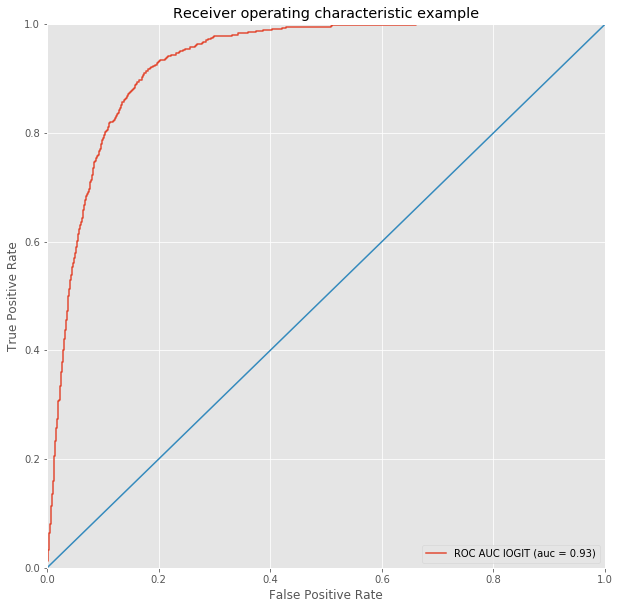

In [282]:
models_name ='lOGIT'
plt.figure(figsize=(10, 10)) 
fpr, tpr, thresholds = roc_curve(y_valid, best_model_logit.predict_proba(X_valid)[:,1])
md=models_name
roc_auc=roc_auc_score(y_valid, best_model_logit.predict_proba(X_valid)[:,1])
plt.plot(fpr, tpr, label='ROC AUC %s (auc = %0.2f)' % (md, roc_auc))
   

plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

In [256]:
#Метод ближайших соседей

In [285]:
model_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])
model_knn.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'))])

In [286]:
y_hat = model_knn.predict(X_valid)

In [287]:
y_hat_proba = model_knn.predict_proba(X_valid, )

In [271]:
scores_test = []
scores_train = []

for k in range(1, 15):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_valid)
    scores_test.append(roc_auc_score(y_valid, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

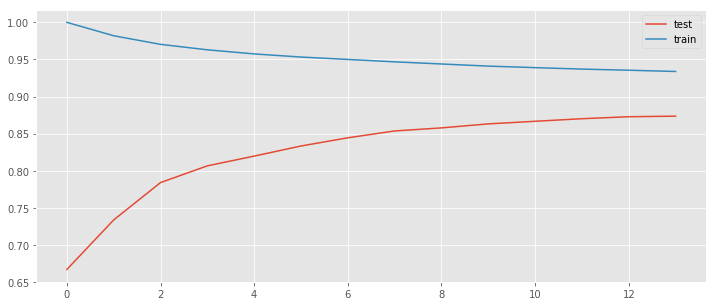

In [284]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

In [288]:
print(classification_report(y_valid, y_hat)) #Качество метода ближайшего соседа при к=7

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      6571
          1       0.60      0.32      0.41       843

avg / total       0.88      0.90      0.88      7414



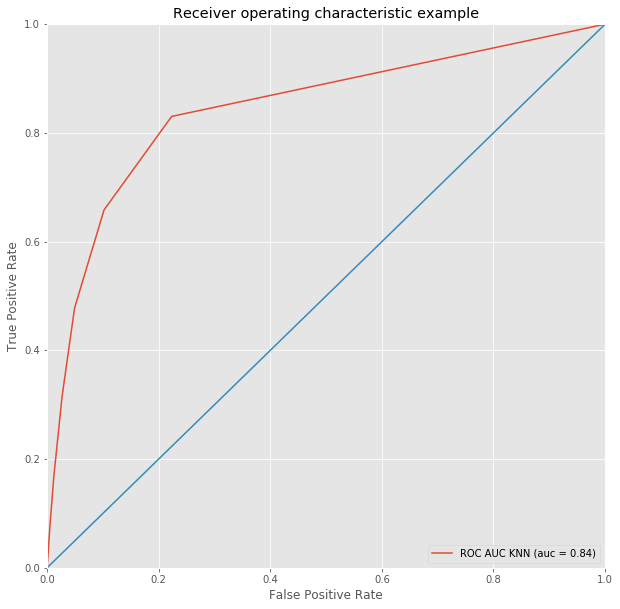

In [290]:
models_name ='KNN'
plt.figure(figsize=(10, 10)) 
fpr, tpr, thresholds = roc_curve(y_valid, y_hat_proba[:,1])
md=models_name
roc_auc=roc_auc_score(y_valid, y_hat_proba[:,1])
plt.plot(fpr, tpr, label='ROC AUC %s (auc = %0.2f)' % (md, roc_auc))
   

plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [298]:
submit_res = pd.read_csv('sample_submission.csv')

In [300]:
df_test_preproc = df_test.pipe(preproc_data)

In [301]:
result = best_model_logit.predict(df_test_preproc)

In [304]:
submit_res.loc[:, 'target'] = result

In [305]:
submit_res[['target']].describe()

,target
count,16476.000000
mean,0.229425
std,0.420476
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [306]:
submit_res.to_csv('sample_submission.csv', sep=',', index=False)